In [1]:
# For most up to date data, go to:
# github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

### Loading the necessary data into df for covid 19 update global until 22nd of may 22

In [2]:
covid_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid_data1 = covid_data.groupby('Country/Region').sum()
covid_data1 = covid_data.drop(columns=['Lat', 'Long','Province/State'], axis=1) 
display(covid_data1.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 123 entries, Country/Region to 5/22/20
dtypes: int64(122), object(1)
memory usage: 255.7+ KB


None

## Listing the countries into regions/contitnents

In [3]:
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh','Bhutan', 'Brunei','Belize', 'Burma', 'Cambodia', 
        'China', 'East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 
        'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',  'Maldives', 'Mongolia', 'Nepal', 'North Korea',
        'Oman', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 
        'Korea, South', 'Sri Lanka', 'Syria', 'Taiwan*', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 
        'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'West Bank and Gaza']
central_asia = ['Tajikistan', 'Uzbekistan', 'Kazakhstan', 'Turkmenistan', 'Kyrgyzstan']
east_asia = ['China', 'Mongolia', 'North Korea', 'Korea, South', 'Japan', 'Hong Kong','Taiwan*', 'Macau', 'Laos' ]
southeast_asia = ['Vietnam', 'Thailand','Indonesia','Philippines', 'Singapore','Cambodia', 'Malaysia', 'Brunei']
south_asia = ['Sri Lanka', 'Bangladesh', 'India', 'Afghanistan', 'Pakistan', 'Bhutan', 'Nepal', 'Burma', 'Maldives', 'Belize']
middle_east = ['Afghanistan', 'Bahrain', 'Qatar', 'United Arab Emirates', 'Yemen', 'Iran', 'West Bank and Gaza',
               'Iraq', 'Israel', 'Jordan', 'Kuwait','Saudi Arabia', 'Lebanon', 'Oman', 'Syria', 'Turkey']

central_africa = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo (Brazzaville)',
                  'Equatorial Guinea', 'Gabon', 'Congo (Kinshasa)', 'Sao Tome']
east_africa =['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda']

south_africa = ['South Africa', 'Zimbabwe', 'Zambia', 'Swaziland', 'Namibia', 'Mozambique', 'Malawi', 'Lesotho', 'Botswana', 'Madagascar']

north_africa = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan','South Sudan', 'Tunisia', 'Western Sahara']

west_africa = ['''Togo, Sierra Leone, Senegal, Nigeria, Niger, Mauritania, Papua New Guinea, Mali, Liberia, Cote d'Ivoire, Guinea-Bissau, Guinea, Ghana, Gambia, Burkina Faso, Benin, Cabo Verde, Sao Tome and Principe, Saint Helena ''']
for c in west_africa:
    west_africa = [d.strip(' ') for d in c.split(',')[0:]]

#copy a list of european countries from google, make little adjustments, make the whole country names a single string qnd convert to a list
# this is faster than making each item a string

europe = ['''Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland,Ireland,Italy,Kazakhstan,Kosovo,Latvia, Liechtenstein,Lithuania,Luxembourg,Malta,Moldova,Monaco, Montenegro,Netherlands,North Macedonia, Norway,Poland,Portugal,Romania,Russia,San Marino, Serbia,Slovakia, Slovenia,  Spain, Sweden, Switzerland, Turkey, Ukraine, United Kingdom, Holy See''']
euro = []
for a in europe:
    euro = [b.strip(' ') for b in a.split(',')[0:]]

euro in covid_data['Country/Region'].unique()

south_america = [ 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Guatemala', 'Colombia', 'Ecuador', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

north_america = ['US', 'Canada', 'Dominica', 'Grenada', 'Panama','Antigua and Barbuda', 'Nicaragua', 'Haiti','Trinidad and Tobago', 'Mexico', 'Bahamas', 'Jamaica', 'Cuba', 'Saint Vincent and the Grenadines', 'San Marino',
                'Belize', 'Costa Rica', 'Honduras', 'El Salvador', 'Poerto Rico', 'Dominican Republic']
north_america_others =[]
for x in north_america:
    if x != 'US' or 'Canada':
        north_america_others.append(x)

australia = ['Australia', 'Fiji', 'New Zealand']
        

C:\Users\TOSIN\anaconda3.12\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


## Identifying continental groups in a new column

In [4]:
for n in euro:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'europe'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'europe'

for n in australia:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'australia'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'australia'
    
for n in asia: 
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'asia'
    if n in middle_east:
        covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'middle east'
    elif n in south_asia:
        covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'south asia'
    elif n in east_asia:
        covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'east asia'        
    elif n in central_asia:
        covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'central asia'
    elif n in southeast_asia:
        covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'south-east asia'


for n in north_africa:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'north africa'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'africa'

for n in east_africa:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'east africa'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'africa'
    
for n in central_africa:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'central africa'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'africa'

for n in west_africa:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'west africa'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'africa'
    
for n in south_africa:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'south africa'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'africa'


for n in south_america:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'south america'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'south america'    
    
    
for n in north_america:
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Sub Continent'] = 'north america'
    covid_data1.loc[covid_data1['Country/Region'] == n, 'Continent'] = 'north america'    
    
covid_data1['Sub Continent'] = covid_data1['Sub Continent'].fillna('others')
covid_data1['Continent'] = covid_data1['Continent'].fillna('others')


### displaying conditions of covid 19 in west africa as at 22nd of may 2020

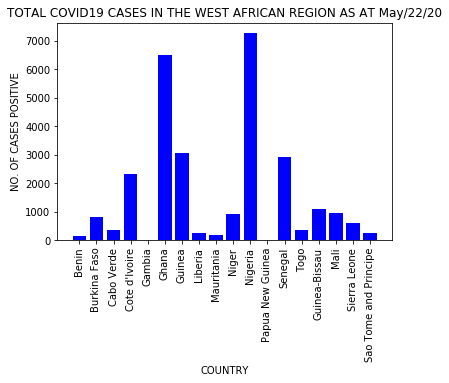

<Figure size 1000x500 with 0 Axes>

In [5]:
western_africa = covid_data1[covid_data1['Sub Continent']== 'west africa']
western_africa_update = western_africa[['Country/Region','5/22/20']]
westAfro = pd.DataFrame(western_africa_update)
# display(westAfro.head(3))
dt = westAfro['5/22/20']

for cols in westAfro['Country/Region']:
    wst_name = [c for c in westAfro['Country/Region']]
    cases = [val for val in dt]
    plt.bar(wst_name, cases, color = 'blue')
plt.title('TOTAL COVID19 CASES IN THE WEST AFRICAN REGION AS AT May/22/20')
plt.xlabel('COUNTRY')
plt.ylabel('NO. OF CASES POSITIVE')
plt.xticks(wst_name, rotation='vertical', size=10)
plt.figure(figsize=(10,5), dpi=100)
plt.show()

naija = westAfro.loc[western_africa['Country/Region']=='Nigeria']['5/22/20']
ghana = westAfro.loc[western_africa['Country/Region']=='Ghana']['5/22/20']

ghana_naija = naija+ghana

other_westafro= westAfro.loc[western_africa['Country/Region']!='Ghana']['5/22/20']

### displaying conditions of covid 19 in South africa as at 22nd of may 2020

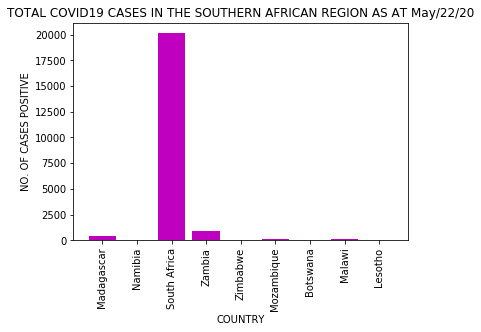

In [6]:
southern_africa = covid_data1[covid_data1['Sub Continent']== 'south africa']
sth_africa = southern_africa.drop(columns = southern_africa.iloc[:,1:-3])
#display(sth_africa.head(3))
st_name = sth_africa['Country/Region']
dtsouth = sth_africa['5/22/20']
for cols in sth_africa['Country/Region']:
    s_countries = [a for a in sth_africa['Country/Region']]
    cases = [b for b in dtsouth]
    plt.bar(s_countries, cases, color = 'm' )
plt.title('TOTAL COVID19 CASES IN THE SOUTHERN AFRICAN REGION AS AT May/22/20')
plt.xlabel('COUNTRY')
plt.ylabel('NO. OF CASES POSITIVE', size = 10)
plt.xticks(s_countries, rotation='vertical', size=10)
plt.show()

### displaying conditions of covid 19 in Northern africa as at 22nd of may 2020

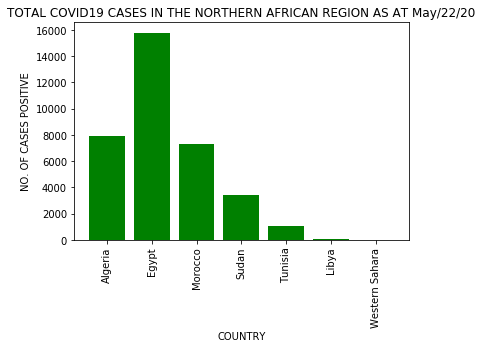

In [7]:
northern_africa = covid_data1[covid_data1['Sub Continent']== 'north africa']
northern_africa = northern_africa.drop(columns = southern_africa.iloc[:,1:-3])
#display(northern_africa.head(3))

for cols in northern_africa:
    nth_afr_ct = [a for a in northern_africa['Country/Region']]
    nth_afr_cases = [b for b in northern_africa['5/22/20']]
    plt.bar(nth_afr_ct, nth_afr_cases, color = 'g' )
plt.title('TOTAL COVID19 CASES IN THE NORTHERN AFRICAN REGION AS AT May/22/20')
plt.xlabel('COUNTRY')
plt.ylabel('NO. OF CASES POSITIVE', size = 10)
plt.xticks(nth_afr_ct, rotation='vertical', size=10)  
plt.show()

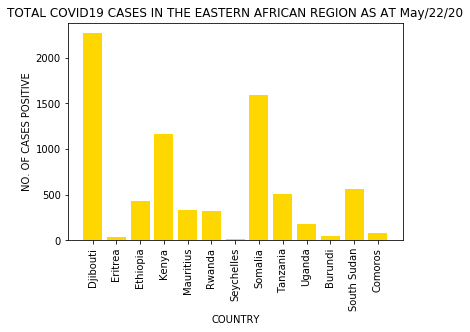

In [8]:
eastern_africa = covid_data1[covid_data1['Sub Continent']=='east africa']
eastern_africa = eastern_africa.drop(columns = eastern_africa.iloc[:,1:-3])
#display(eastern_africa.head(3))

for cols in eastern_africa:
    east_afr_ct = [a for a in eastern_africa['Country/Region']]
    east_afr_cases = [b for b in eastern_africa['5/22/20']]
    plt.bar(east_afr_ct, east_afr_cases, color = 'gold' )
plt.title('TOTAL COVID19 CASES IN THE EASTERN AFRICAN REGION AS AT May/22/20')
plt.xlabel('COUNTRY')
plt.ylabel('NO. OF CASES POSITIVE', size = 10)
plt.xticks(east_afr_ct, rotation='vertical', size=10)  
plt.show()

### displaying the covid 19 conditions in central africa as of 22 may 2020

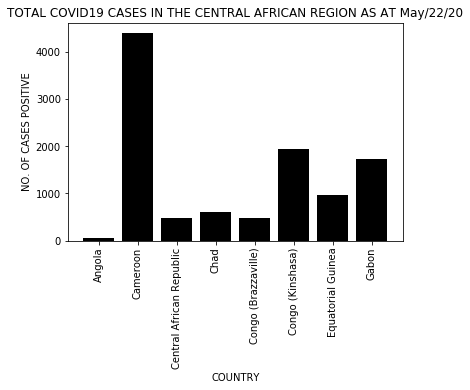

In [9]:
central_africa_region= covid_data1[covid_data1['Sub Continent']=='central africa'].drop(columns = covid_data1.iloc[:,1:-3])
#display(central_africa_region.head(3))
for cols in central_africa_region: 
    plt.bar([a for a in central_africa_region['Country/Region']], [b for b in central_africa_region['5/22/20']], color = 'black' )
plt.title('TOTAL COVID19 CASES IN THE CENTRAL AFRICAN REGION AS AT May/22/20')
plt.xlabel('COUNTRY')
plt.ylabel('NO. OF CASES POSITIVE', size = 10)
plt.xticks([a for a in central_africa_region['Country/Region']], rotation='vertical', size=10)  
plt.show()

### comparing ccontinents of the world

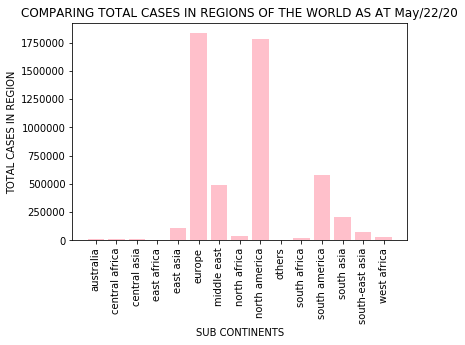

In [10]:
regional_look =covid_data1.groupby('Sub Continent').sum()
regional_look = regional_look.drop(columns =regional_look.iloc[:, :-1])# it picks from 0 to -1 and ommits -1

sub_continents = [sub_conts for sub_conts, col in covid_data1.groupby(['Sub Continent'])]

for cols in regional_look:
    plt.bar( sub_continents, regional_look['5/22/20'], color = 'pink')
    plt.xlabel('SUB CONTINENTS')
    plt.ylabel('TOTAL CASES IN REGION')
    plt.title('COMPARING TOTAL CASES IN REGIONS OF THE WORLD AS AT May/22/20')
    plt.xticks(sub_continents, rotation='vertical', size=10)
    plt.show()

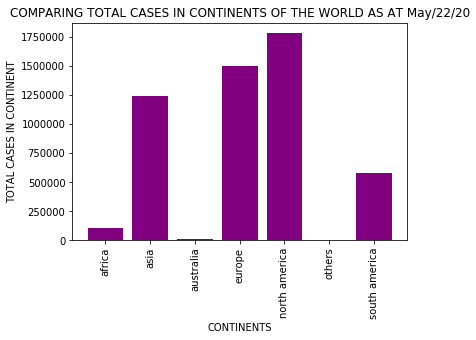

In [11]:
continental_look =covid_data1.groupby('Continent').sum()
continental_look = continental_look.drop(columns=continental_look.iloc[:, :-1])# it picks from 0 to -1 and ommits -1
# display(continental_look)
continents = [conts for conts, c in covid_data1.groupby(['Continent'])]# this shows for 'col' in 'df', for 'conts' in 'col', return 'conts'

for cols in continental_look:
    plt.bar( continents, continental_look['5/22/20'], color = 'purple')
    plt.xlabel('CONTINENTS')
    plt.ylabel('TOTAL CASES IN CONTINENT')
    plt.title('COMPARING TOTAL CASES IN CONTINENTS OF THE WORLD AS AT May/22/20')
    plt.xticks(continents, rotation='vertical', size=10)
    plt.show()

###  Looking at top cases in europe

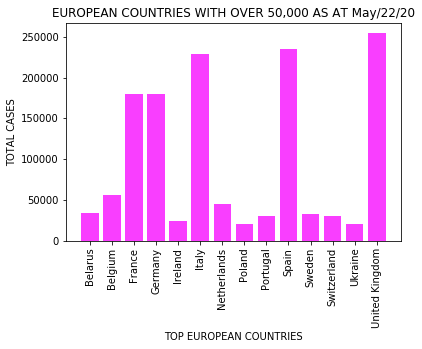

In [12]:
eu = covid_data1[covid_data1['Continent']=='europe'].drop(columns = covid_data1.iloc[:,1:-3])
eu = eu.drop(columns = ['Continent', 'Sub Continent'])
pd.to_numeric(eu['5/22/20'])
eu_to_look = eu[eu['5/22/20']>= 20000]

eu_plot = plt.bar( eu_to_look['Country/Region'], eu_to_look['5/22/20'], color = '#f929ff', alpha= 0.9)# 'alpha' controls the transparency of the bars
plt.xlabel('TOP EUROPEAN COUNTRIES')
plt.ylabel('TOTAL CASES')
plt.title('EUROPEAN COUNTRIES WITH OVER 50,000 AS AT May/22/20')
plt.xticks( rotation='vertical', size=10)
plt.show()

eu_tolook_html = eu_to_look.to_html()


### Getting daily cases up to may 22, 2020

In [18]:
#to know the cases for each day, find the differnce between current day from prceeding day using the .diff function 
# then drop the first column which will be NaN


covid_ana= covid_data1.drop(columns = ['Country/Region','Continent','Sub Continent']).diff(axis=1)
covid_ana_daily = covid_ana.drop(columns = ['1/22/20'])
covid_ana_daily = covid_ana_daily.join(covid_data1['Country/Region'], how = 'inner')

covid_ana_daily1 = covid_ana_daily.groupby('Country/Region').sum() # to sum up duplicates
covid_ana_daily1 = covid_ana_daily1.stack() # breaks down the rows based on index which is country

covid_ana_daily12 = covid_ana_daily1.unstack(0) # pivots the index into a column and cols into iets of the new index 
covid_ana_daily12

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/18/20,408.0,2.0,182.0,0.0,2.0,0.0,303.0,351.0,14.0,27.0,...,2714.0,3.0,38.0,77.0,4.0,7.0,0.0,2.0,8.0,2.0
5/19/20,581.0,1.0,176.0,0.0,2.0,0.0,438.0,218.0,4.0,52.0,...,2429.0,1.0,64.0,131.0,0.0,3.0,0.0,37.0,11.0,0.0
5/20/20,492.0,15.0,165.0,1.0,0.0,0.0,474.0,230.0,9.0,32.0,...,-519.0,8.0,84.0,75.0,0.0,7.0,0.0,17.0,60.0,2.0
5/21/20,531.0,5.0,186.0,0.0,6.0,0.0,648.0,335.0,14.0,51.0,...,2627.0,3.0,25.0,58.0,0.0,25.0,0.0,13.0,34.0,3.0


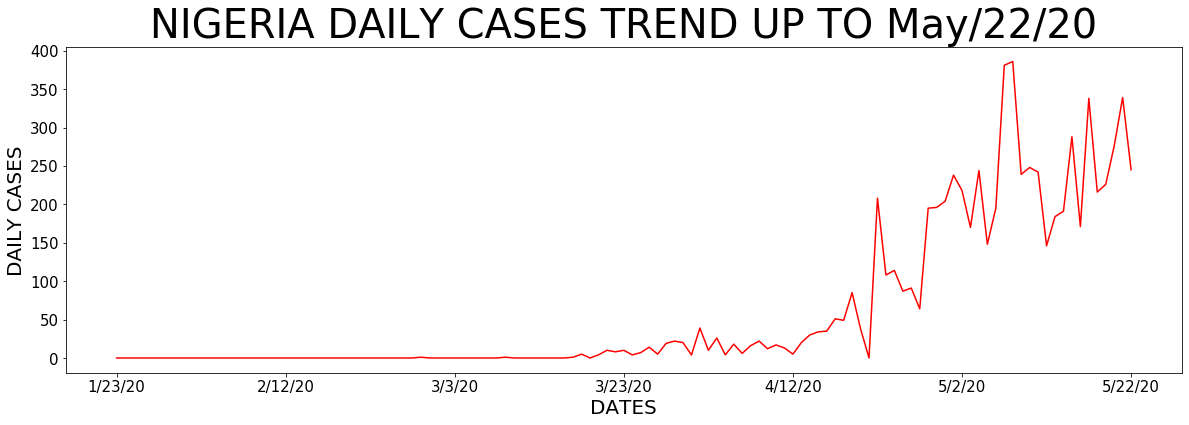

In [17]:
# time to plot a line series of the data

covid_ana_daily12['Nigeria'].plot(kind='line', color = 'r')
plt.rcParams['figure.figsize'] = (20, 6)#same as plt.figure(figsize=(length, breath))
plt.xlabel('DATES', size=20)
plt.ylabel('DAILY CASES', size=20)
plt.title('NIGERIA DAILY CASES TREND UP TO May/22/20', size= 40)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()



### LOOKING AT TOTAL CASES OVER TIME UP TILL MAY 22, 2020

In [15]:
covid_tr= covid_data1.drop(columns = ['Continent','Sub Continent'])
covid_tr = covid_tr.groupby('Country/Region').sum() # to sum up duplicates
covid_tr1 = covid_tr.stack() # breaks down the rows based on index
covid_tr1 = covid_tr1.unstack(0) # pivots the index into a column and cols into iets of the new index 
covid_tr1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/18/20,7072,948,7201,761,50,25,8371,4823,7068,16269,...,247709,737,2791,618,324,388,6,130,761,46
5/19/20,7653,949,7377,761,52,25,8809,5041,7072,16321,...,250138,738,2855,749,324,391,6,167,772,46
5/20/20,8145,964,7542,762,52,25,9283,5271,7081,16353,...,249619,746,2939,824,324,398,6,184,832,48
5/21/20,8676,969,7728,762,58,25,9931,5606,7095,16404,...,252246,749,2964,882,324,423,6,197,866,51


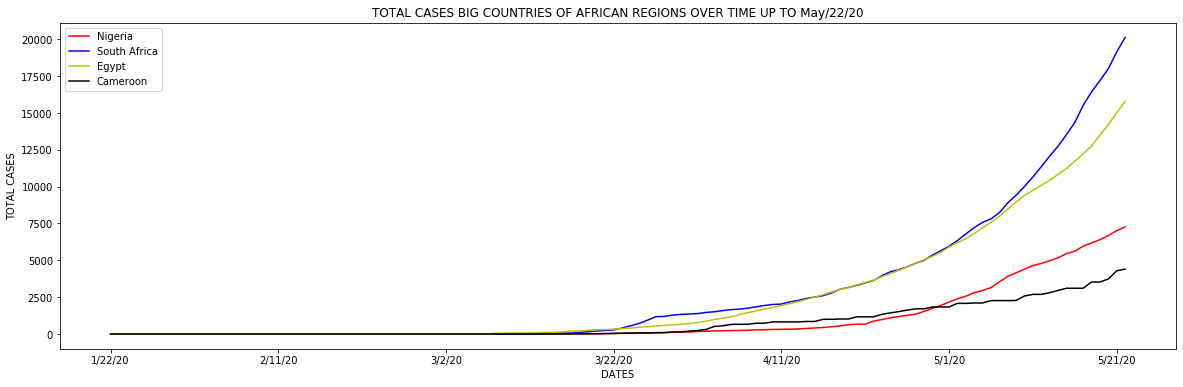

In [16]:
# Plotting that selected African countries
covid_tr1['Nigeria'].plot(kind='line', color = 'r')
covid_tr1['South Africa'].plot(kind='line', color = 'b')
covid_tr1['Egypt'].plot(kind='line', color = 'y')
covid_tr1['Cameroon'].plot(kind='line', color = 'k')
plt.xlabel('DATES')
plt.ylabel('TOTAL CASES')
plt.title('TOTAL CASES BIG COUNTRIES OF AFRICAN REGIONS OVER TIME UP TO May/22/20')
plt.legend()
plt.show()
